<a href="https://colab.research.google.com/github/Lionel-Lim/casa0018/blob/main/casa0018/casa0018/Assessment/Projects/Final%20Project/src/trainingData/test_4/trainingModel_test4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence

In [2]:
from google.colab.output import eval_js
eval_js('google.colab.output.setIframeHeight("500")')

In [3]:
!wget https://raw.githubusercontent.com/Lionel-Lim/casa0018/main/Assessment/Projects/Final%20Project/src/trainingData/test_3/test_3.zip
!unzip test_3.zip

--2023-03-18 21:18:20--  https://raw.githubusercontent.com/Lionel-Lim/casa0018/main/Assessment/Projects/Final%20Project/src/trainingData/test_3/test_3.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52981233 (51M) [application/zip]
Saving to: ‘test_3.zip’

test_3.zip          100%[===================>]  50.53M   317MB/s    in 0.2s    

2023-03-18 21:18:24 (317 MB/s) - ‘test_3.zip’ saved [52981233/52981233]

Archive:  test_3.zip
  inflating: validate_filtered.csv   
   creating: validate_filtered/
  inflating: __MACOSX/._validate_filtered  
  inflating: validate_filtered/147_961.851773702.png  
  inflating: __MACOSX/validate_filtered/._147_961.851773702.png  
  inflating: validate_filtered/429_1018.315800561.png  
  inflating: __MACOSX/validate_filtered/.

In [4]:
# Define the headers
headers = ['timestamp', 'status', 'orientation', 'position', 'acceleration']

# Read in the CSV files as DataFrames
train_df = pd.read_csv("training_filtered.csv",header=None, names=headers)
valid_df = pd.read_csv("validate_filtered.csv",header=None, names=headers)
test_df = pd.read_csv("testData_filtered.csv",header=None, names=headers)

# Select only the first 90% of the data
eighty_percent_index = int(0.9 * len(train_df))
train_df = train_df.iloc[:eighty_percent_index]
eighty_percent_index = int(0.9 * len(valid_df))
valid_df = valid_df.iloc[:eighty_percent_index]
eighty_percent_index = int(0.9 * len(test_df))
test_df = test_df.iloc[:eighty_percent_index]

# Add a new column to each DataFrame to identify it
train_df = train_df.assign(dataset='training')
valid_df = valid_df.assign(dataset='validation')
test_df = test_df.assign(dataset='test')

In [5]:
# Add a new column for the depth images
train_df['depth_image'] = None
valid_df['depth_image'] = None
test_df['depth_image'] = None
imageAddress = [
    "/content/training_filtered",
    "/content/validate_filtered",
    "/content/test_filtered"]
for index, df in enumerate([train_df, valid_df, test_df]):
  # Load the depth images and add them to the DataFrame
  for i, row in df.iterrows():
      # Get the timestamp and image file name
      timestamp = row['timestamp']
      image_name = f"{i+1}_{timestamp}.png"
      
      # Load the image and convert it to a numpy array
      image_path = os.path.join(imageAddress[index], image_name)
      image = Image.open(image_path)
      # Convert the image to a numpy array
      image_array = np.array(image)
      # Reshape the array to have the correct dimensions
      image_array = image_array.reshape((1, 400, 640, 1))

      # Squeeze the array to remove the first dimension and get a 2D array
      image_array = image_array.squeeze()

      # Add the image array to the DataFrame
      df.at[i, 'depth_image'] = image_array

In [6]:
# Concatenate all the DataFrames into a single DataFrame
all_df = pd.concat([train_df, valid_df, test_df], ignore_index=True)

# Print the first few rows to check if the new column has been added
all_df.head()

,timestamp,status,orientation,position,acceleration,dataset,depth_image
0,765.928284,TRACKING,-0.3821582940036269/0.565644928702032/-0.60416...,0.00431119679577456/0.012621240850431247/0.024...,-6.436549205382248e-05/-1.7008188548929915e-05...,training,"[[0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,..."
1,766.128227,TRACKING,-0.3921728755276281/0.5610758834415921/-0.5958...,-0.0028496002688221233/0.021909578133051662/0....,-0.0012899692375450125/-0.0003408665002690985/...,training,"[[6, 9, 12, 13, 14, 14, 14, 14, 15, 16, 18, 19..."
2,766.328076,TRACKING,-0.42045968459333843/0.5463356661997151/-0.573...,-0.017439763383390844/0.030261957894410246/-0....,-0.0010125449935970048/-0.00026755883651090887...,training,"[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,..."
3,766.727595,TRACKING,-0.4142636241738888/0.5628696080818422/-0.5711...,-0.004423545511615707/0.04190686128072127/-0.0...,-0.0010431929360426675/-0.0002756573683036388/...,training,"[[22, 22, 22, 23, 23, 23, 24, 24, 24, 24, 24, ..."
4,767.162666,TRACKING,-0.424028494401779/0.556239291554674/-0.569920...,0.016697937975901554/0.042439496052923985/-0.0...,-0.0003495121565044577/-9.235645480656102e-05/...,training,"[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,..."


In [7]:
# Split the orientation column into four separate columns
all_df[['ori_w', 'ori_x', 'ori_y', 'ori_z']] = all_df['orientation'].str.split('/', expand=True)

# Split the position column into three separate columns
all_df[['pos_x', 'pos_y', 'pos_z']] = all_df['position'].str.split('/', expand=True)

# Split the acceleration column into three separate columns
all_df[['acc_x', 'acc_y', 'acc_z']] = all_df['acceleration'].str.split('/', expand=True)

# Convert the data types of the columns to float32
all_df = all_df.astype({'ori_w': 'float32', 'ori_x': 'float32', 'ori_y': 'float32', 'ori_z': 'float32', 'pos_x': 'float32', 'pos_y': 'float32', 'pos_z': 'float32', 'acc_x': 'float32', 'acc_y': 'float32', 'acc_z': 'float32'})
all_df['depth_image'] = all_df['depth_image'].apply(lambda x: x.astype('float32'))

# # Find the global maximum pixel value across all depth images
# global_max_pixel_value = np.max([np.max(img) for img in all_df['depth_image']])

# # Normalize all depth images using the global maximum pixel value
# all_df['normalized_depth_image'] = all_df['depth_image'].apply(lambda img: img / global_max_pixel_value)

all_df = all_df.drop(['orientation', 'position', 'acceleration'], axis=1)
all_df.head()

,timestamp,status,dataset,depth_image,ori_w,ori_x,ori_y,ori_z,pos_x,pos_y,pos_z,acc_x,acc_y,acc_z
0,765.928284,TRACKING,training,"[[0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",-0.382158,0.565645,-0.604166,0.411077,0.004311,0.012621,0.024815,-0.000064,-0.000017,-0.000004
1,766.128227,TRACKING,training,"[[6.0, 9.0, 12.0, 13.0, 14.0, 14.0, 14.0, 14.0...",-0.392173,0.561076,-0.595854,0.419944,-0.002850,0.021910,0.007111,-0.001290,-0.000341,-0.000071
2,766.328076,TRACKING,training,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0,...",-0.420460,0.546336,-0.573029,0.443136,-0.017440,0.030262,-0.012189,-0.001013,-0.000268,-0.000056
3,766.727595,TRACKING,training,"[[22.0, 22.0, 22.0, 23.0, 23.0, 23.0, 24.0, 24...",-0.414264,0.562870,-0.571193,0.430467,-0.004424,0.041907,-0.071835,-0.001043,-0.000276,-0.000058
4,767.162666,TRACKING,training,"[[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",-0.424028,0.556239,-0.569920,0.431265,0.016698,0.042439,-0.064486,-0.000350,-0.000092,-0.000019


In [8]:
# Convert the depth image data to a 4D numpy array of shape (num_samples, 400, 640, 1)
depth_data = np.stack(all_df['depth_image'].to_numpy(), axis=0).reshape(-1, 400, 640)

# Convert the orientation data to a numpy array
ori_data = all_df[['ori_w', 'ori_x', 'ori_y', 'ori_z']].to_numpy()

# Convert the orientation data to a numpy array
# acc_data = all_df[['acc_x', 'acc_y', 'acc_z']].to_numpy()
acc_data = all_df[['acc_x', 'acc_y']].to_numpy()

# Convert the current position data to a numpy array
# curr_pos_data = all_df[['pos_x', 'pos_y', 'pos_z']].to_numpy()
curr_pos_data = all_df[['pos_x', 'pos_y']].to_numpy()

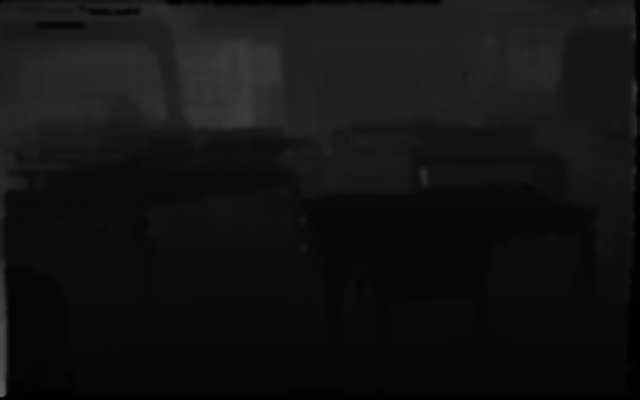

In [25]:
# Convert the NumPy array back to an image
img = Image.fromarray(depth_data[1])

# Show the image
img.show()


In [9]:
# Create boolean masks for each dataset
train_mask = all_df['dataset'] == 'training'
test_mask = all_df['dataset'] == 'test'
valid_mask = all_df['dataset'] == 'validation'

# Extract the data for each dataset
train_depth = np.stack(all_df.loc[train_mask, 'depth_image'].to_numpy(), axis=0).reshape(-1, 400, 640)
train_ori = all_df.loc[train_mask, ['ori_w', 'ori_x', 'ori_y', 'ori_z']].to_numpy()
# train_acc = all_df.loc[train_mask, ['acc_x', 'acc_y', 'acc_z']].to_numpy()
# train_pos = all_df.loc[train_mask, ['pos_x', 'pos_y', 'pos_z']].to_numpy()
train_acc = all_df.loc[train_mask, ['acc_x', 'acc_y']].to_numpy()
train_pos = all_df.loc[train_mask, ['pos_x', 'pos_y']].to_numpy()

test_depth = np.stack(all_df.loc[test_mask, 'depth_image'].to_numpy(), axis=0).reshape(-1, 400, 640)
test_ori = all_df.loc[test_mask, ['ori_w', 'ori_x', 'ori_y', 'ori_z']].to_numpy()
# test_acc = all_df.loc[test_mask, ['acc_x', 'acc_y', 'acc_z']].to_numpy()
# test_pos = all_df.loc[test_mask, ['pos_x', 'pos_y', 'pos_z']].to_numpy()
test_acc = all_df.loc[test_mask, ['acc_x', 'acc_y']].to_numpy()
test_pos = all_df.loc[test_mask, ['pos_x', 'pos_y']].to_numpy()

val_depth = np.stack(all_df.loc[valid_mask, 'depth_image'].to_numpy(), axis=0).reshape(-1, 400, 640)
val_ori = all_df.loc[valid_mask, ['ori_w', 'ori_x', 'ori_y', 'ori_z']].to_numpy()
# val_acc = all_df.loc[valid_mask, ['acc_x', 'acc_y', 'acc_z']].to_numpy()
# val_pos = all_df.loc[valid_mask, ['pos_x', 'pos_y', 'pos_z']].to_numpy()
val_acc = all_df.loc[valid_mask, ['acc_x', 'acc_y']].to_numpy()
val_pos = all_df.loc[valid_mask, ['pos_x', 'pos_y']].to_numpy()

# Print the shapes of the data sets
print(f'Training data shapes: depth={train_depth.shape}, ori={train_ori.shape}, acc={train_acc.shape}, curr_pos={train_pos.shape}')
print(f'Validation data shapes: depth={val_depth.shape}, ori={val_ori.shape}, acc={val_acc.shape}, curr_pos={val_pos.shape}')
print(f'test data shapes: depth={test_depth.shape}, ori={test_ori.shape}, acc={test_acc.shape}, curr_pos={test_pos.shape}')

Training data shapes: depth=(623, 400, 640), ori=(623, 4), acc=(623, 2), curr_pos=(623, 2)
Validation data shapes: depth=(477, 400, 640), ori=(477, 4), acc=(477, 2), curr_pos=(477, 2)
test data shapes: depth=(400, 400, 640), ori=(400, 4), acc=(400, 2), curr_pos=(400, 2)


In [10]:
# Function to generate time series data
def generate_time_series_data(data, n_steps):
    num_samples, num_features = data.shape
    X = np.zeros((num_samples - n_steps + 1, n_steps, num_features))
    
    for i in range(num_samples - n_steps + 1):
        X[i] = data[i:i + n_steps]
    
    return X
  
# Define the number of time steps
n_steps = 5

# Combine orientation and acceleration data
train_other_data = np.concatenate([train_ori, train_acc], axis=1)
val_other_data = np.concatenate([val_ori, val_acc], axis=1)
test_other_data = np.concatenate([test_ori, test_acc], axis=1)

# Generate time series data for orientation and acceleration
train_other_data_time_series = generate_time_series_data(train_other_data, n_steps)
val_other_data_time_series = generate_time_series_data(val_other_data, n_steps)
test_other_data_time_series = generate_time_series_data(test_other_data, n_steps)

# Update position data to match the time series data
train_curr_pos_time_series = train_pos[n_steps - 1:]
val_curr_pos_time_series = val_pos[n_steps - 1:]
test_curr_pos_time_series = test_pos[n_steps - 1:]

# Update depth data to match the time series data
train_depth_time_series = train_depth[n_steps - 1:]
val_depth_time_series = val_depth[n_steps - 1:]
test_depth_time_series = test_depth[n_steps - 1:]

# Add the channel dimension to the depth images
train_depth_time_series = train_depth_time_series[..., np.newaxis]
val_depth_time_series = val_depth_time_series[..., np.newaxis]
test_depth_time_series = test_depth_time_series[..., np.newaxis]

# Print the shapes of the data sets
print(f'Training data shapes: depth={train_depth_time_series.shape}, other_data={train_other_data_time_series.shape}, curr_pos={train_curr_pos_time_series.shape}')
print(f'Validation data shapes: depth={val_depth_time_series.shape}, other_data={val_other_data_time_series.shape}, curr_pos={val_curr_pos_time_series.shape}')
print(f'Testing data shapes: depth={test_depth_time_series.shape}, other_data={test_other_data_time_series.shape}, curr_pos={test_curr_pos_time_series.shape}')

Training data shapes: depth=(619, 400, 640, 1), other_data=(619, 5, 6), curr_pos=(619, 2)
Validation data shapes: depth=(473, 400, 640, 1), other_data=(473, 5, 6), curr_pos=(473, 2)
Testing data shapes: depth=(396, 400, 640, 1), other_data=(396, 5, 6), curr_pos=(396, 2)


# Original Model

In [10]:
# Model structure
depth_map_shape = (400, 640, 1)
other_data_shape = (n_steps, 7)  # Time steps x (Orientation + Acceleration)

depth_map_input = tf.keras.layers.Input(shape=depth_map_shape)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(depth_map_input)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
cnn_output = x

other_data_input = tf.keras.layers.Input(shape=other_data_shape)
y = tf.keras.layers.LSTM(128, stateful=False)(other_data_input)
lstm_output = y

combined = tf.keras.layers.Concatenate()([cnn_output, lstm_output])

z = tf.keras.layers.Dense(128, activation='relu')(combined)
position_output = tf.keras.layers.Dense(3, activation='linear')(z)

model = tf.keras.Model(inputs=[depth_map_input, other_data_input], outputs=position_output)
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 400, 640, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 398, 638, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 199, 319, 32  0           ['conv2d[0][0]']                 
                                )                                                             

# Alt Model

In [12]:
depth_map_shape = (400, 640, 1)
# other_data_shape = (n_steps, 7) # Time steps x (Orientation + Acceleration)
other_data_shape = (n_steps, 6)  # Time steps x (Orientation + Acceleration(XY))
dropout_rate = 0.2

depth_map_input = tf.keras.layers.Input(shape=depth_map_shape)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(depth_map_input)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)
cnn_output = x

other_data_input = tf.keras.layers.Input(shape=other_data_shape)
y = tf.keras.layers.LSTM(128, return_sequences=True, stateful=False)(other_data_input)
y = tf.keras.layers.Dropout(dropout_rate)(y)
y = tf.keras.layers.LSTM(128)(y)
y = tf.keras.layers.Dropout(dropout_rate)(y)
lstm_output = y

combined = tf.keras.layers.Concatenate()([cnn_output, lstm_output])

z = tf.keras.layers.Dense(128, activation='relu')(combined)
z = tf.keras.layers.Dropout(dropout_rate)(z)
# position_output = tf.keras.layers.Dense(3, activation='linear')(z)
# Predict only X,Y
position_output = tf.keras.layers.Dense(2, activation='linear')(z)


model = tf.keras.Model(inputs=[depth_map_input, other_data_input], outputs=position_output)
model.compile(optimizer='adam', loss='mse')

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 400, 640, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 398, 638, 32  320         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 199, 319, 32  0          ['conv2d_2[0][0]']               
                                )                                                           

In [35]:
depth_map_shape = (400, 640, 1)
dropout_rate = 0.2

depth_map_input = tf.keras.layers.Input(shape=depth_map_shape)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(depth_map_input)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)

# position_output = tf.keras.layers.Dense(3, activation='linear')(z)
# Predict only X,Y
position_output = tf.keras.layers.Dense(2, activation='linear')(x)


model = tf.keras.Model(inputs=depth_map_input, outputs=position_output)
model.compile(optimizer='adam', loss='mse')

model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 400, 640, 1)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 398, 638, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 199, 319, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 197, 317, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 98, 158, 64)      0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 990976)            0   

In [39]:
# Training
epochs = 50
batch_size = 32

# history = model.fit(
#     [train_depth_time_series, train_other_data_time_series],
#     train_curr_pos_time_series,
#     validation_data=([val_depth_time_series, val_other_data_time_series], val_curr_pos_time_series),
#     epochs=epochs,
#     batch_size=batch_size
# )

history = model.fit(
    train_depth_time_series,
    train_curr_pos_time_series,
    validation_data=(val_depth_time_series, val_curr_pos_time_series),
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/50
20/20 [==============================] - 6s 256ms/step - loss: 162529.3281 - val_loss: 119.0208
Epoch 2/50
20/20 [==============================] - 4s 209ms/step - loss: 112.4853 - val_loss: 17.2410
Epoch 3/50
20/20 [==============================] - 4s 207ms/step - loss: 37.2396 - val_loss: 24.0779
Epoch 4/50
20/20 [==============================] - 5s 237ms/step - loss: 25.6131 - val_loss: 22.3049
Epoch 5/50
20/20 [==============================] - 4s 209ms/step - loss: 24.2365 - val_loss: 20.5050
Epoch 6/50
20/20 [==============================] - 4s 208ms/step - loss: 23.7937 - val_loss: 20.5525
Epoch 7/50
20/20 [==============================] - 4s 212ms/step - loss: 20.5861 - val_loss: 19.8908
Epoch 8/50
20/20 [==============================] - 4s 209ms/step - loss: 18.5195 - val_loss: 19.6325
Epoch 9/50
20/20 [==============================] - 5s 239ms/step - loss: 20.6462 - val_loss: 19.9199
Epoch 10/50
20/20 [==============================] - 4s 213ms/step - loss: 1

In [40]:
mse = model.evaluate(test_depth_time_series, test_curr_pos_time_series)

13/13 [==============================] - 1s 54ms/step - loss: 23.3233


# Image Augmentation

In [29]:
# Training
epochs = 50
batch_size = 32

In [38]:
class CustomDataGenerator(Sequence):
    def __init__(self, depth_data, other_data, position_data, batch_size, data_gen):
        self.depth_data = depth_data
        self.other_data = other_data
        self.position_data = position_data
        self.batch_size = batch_size
        self.data_gen = data_gen

    def __len__(self):
        return int(np.ceil(len(self.depth_data) / float(self.batch_size)))

    def __getitem__(self, idx):
        # Get the depth data for the current batch
        batch_depth_data = self.depth_data[idx * self.batch_size: (idx + 1) * self.batch_size]
        
        # Apply data augmentation to the depth data
        augmented_depth_data = np.zeros_like(batch_depth_data)
        for i, depth_map in enumerate(batch_depth_data):
            augmented_depth_data[i] = self.data_gen.random_transform(depth_map)

        # Get the other data for the current batch
        batch_other_data = self.other_data[idx * self.batch_size: (idx + 1) * self.batch_size]

        # Get the position data for the current batch
        batch_position_data = self.position_data[idx * self.batch_size: (idx + 1) * self.batch_size]

        return [augmented_depth_data, batch_other_data], batch_position_data

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

train_generator = CustomDataGenerator(train_depth_time_series, train_other_data_time_series, train_curr_pos_time_series, batch_size, datagen)

history = model.fit(
    train_generator,
    validation_data=([val_depth_time_series, val_other_data_time_series], val_curr_pos_time_series),
    epochs=epochs,
    steps_per_epoch=len(train_generator)
)



ValueError: ignored

# XYZ Prediction
epochs = 50, batch_size = 32, GRU \
loss: 5.3 - val_loss: 8.3 \

epochs = 50, batch_size = 16, LSTM \
loss: 5.6277 - val_loss: 8.3782

# XY Prediction
epochs = 50, batch_size = 32, LSTM \
loss: 8.0417 - val_loss: 12.8240

In [15]:
mse = model.evaluate([test_depth_time_series, test_other_data_time_series], test_curr_pos_time_series)

13/13 [==============================] - 1s 83ms/step - loss: 22.5069


# Test Model

In [41]:
testIndex = 0
batch = 5
itt = 80
test = []
predic = []
for i in range(itt):
  # truth = test_curr_pos_time_series[testIndex+(batch*i):testIndex+(batch*(i+1))]
  # data = [test_depth_time_series[testIndex+(batch*i):testIndex+(batch*(i+1))], test_other_data_time_series[testIndex+(batch*i):testIndex+(batch*(i+1))]]
  # coordinates = model.predict(data)
  truth = test_curr_pos_time_series[testIndex+(batch*i):testIndex+(batch*(i+1))]
  data = test_depth_time_series[testIndex+(batch*i):testIndex+(batch*(i+1))]
  coordinates = model.predict(data)
  
  test.append(truth)
  predic.append(coordinates)
test = np.concatenate(test, axis=0)
predic = np.concatenate(predic, axis=0)
print('Model Prediction is : {}'.format(predic))
print('True Value is : {}'.format(test))

1/1 [==============================] - 0s 19ms/step
Model Prediction is : [[ 7.82333195e-01  1.31303763e+00]
 [ 6.90225959e-01  1.32237113e+00]
 [ 1.09282911e+00  1.56769943e+00]
 [ 6.03895545e-01  1.59138799e+00]
 [ 8.10513079e-01  7.21337020e-01]
 [ 7.94454098e-01  1.04520917e+00]
 [ 1.10444772e+00  9.12182450e-01]
 [ 1.06973648e+00  3.14352721e-01]
 [ 7.72522211e-01  9.03234601e-01]
 [ 9.18750525e-01  9.29457188e-01]
 [ 8.55677843e-01  5.44878423e-01]
 [ 9.72182214e-01  9.27576423e-01]
 [ 1.70231891e+00 -4.79247004e-01]
 [ 6.69793606e-01  8.91440749e-01]
 [ 1.20993316e+00  5.17901659e-01]
 [ 7.87244558e-01  9.36151266e-01]
 [ 1.40359366e+00  6.06175423e-01]
 [ 1.12951481e+00  9.56534863e-01]
 [ 1.14174497e+00  6.84817672e-01]
 [ 7.33373582e-01  9.88753200e-01]
 [ 7.96849072e-01  9.44771051e-01]
 [ 7.36097395e-01  9.65356767e-01]
 [ 1.35518968e+00  7.30418682e-01]
 [ 1.27928686e+00  1.12035346e+00]
 [ 1.87559462e+00  8.38495493e-01]
 [ 2.50636053e+00  4.06689376e-01]
 [ 2.71539545e+0

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.lines as mlines

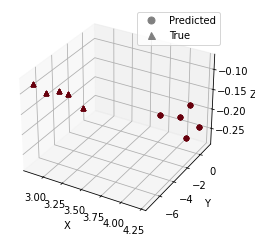

In [54]:
# Create a 3D scatter plot of the predicted and true values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
num_points = batch

# Create a colormap for color gradation
cmap = plt.get_cmap('Reds')

for i, (predictValue, trueValue) in enumerate(zip(predic, test)):
    color = cmap(i / num_points)
    ax.scatter(predictValue[0], predictValue[1], predictValue[2], color=color, marker='o')
    ax.scatter(trueValue[0], trueValue[1], trueValue[2], color=color, marker='^')

# Set the limits for each axis
# ax.set_xlim([0, 10])
# ax.set_ylim([0, 10])
# ax.set_zlim([-10, 10])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Create custom legend handles
predicted_handle = mlines.Line2D([], [], color='gray', marker='o', linestyle='', markersize=7, label='Predicted')
true_handle = mlines.Line2D([], [], color='gray', marker='^', linestyle='', markersize=7, label='True')
ax.legend(handles=[predicted_handle, true_handle], loc='upper right')

plt.show()

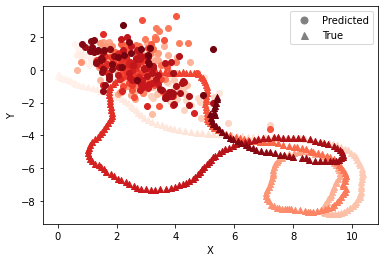

In [42]:
# Create a 2D scatter plot of the predicted and true values
fig, ax = plt.subplots()
num_points = batch * itt

# Create a colormap for color gradation
cmap = plt.get_cmap('Reds')

for i, (predictValue, trueValue) in enumerate(zip(predic, test)):
    color = cmap(i / num_points)
    ax.scatter(predictValue[0], predictValue[1], color=color, marker='o')
    ax.scatter(trueValue[0], trueValue[1], color=color, marker='^')

ax.set_xlabel('X')
ax.set_ylabel('Y')

# Create custom legend handles
predicted_handle = plt.Line2D([], [], color='gray', marker='o', linestyle='', markersize=7, label='Predicted')
true_handle = plt.Line2D([], [], color='gray', marker='^', linestyle='', markersize=7, label='True')
ax.legend(handles=[predicted_handle, true_handle], loc='upper right')

plt.show()
